TELCOM CUSTOMER CHURN AND REVENUE ANALYSIS

1.Introduction

The telecommunications industry is highly competitive, making customer retention and revenue optimization critical for business success. Telecom companies collect large volumes of customer data, but transforming this data into actionable insights remains a challenge.

The goal of this project is to analyze telecom customer data to understand revenue patterns and factors influencing customer churn, using data cleaning and exploratory data analysis techniques. The insights derived from this analysis aim to support data-driven decision-making and help improve customer retention strategies.



1. Introduction & Problem Statement
2. Business Understanding
3. Data Understanding (Data Description)
4. Data Cleaning
5. Feature Engineering
6. Exploratory Data Analysis (EDA)
7. Data Visualizations
8. Key Insights
9. Business Recommendations
10. Conclusion



PROBLEM STATEMENT

The goal of this project is to analyze telecom customer data to understand revenue patterns and factors influencing customer churn. This will be achieved through data cleaning, feature engineering, and exploratory data analysis, with the aim of uncovering insights that can help the company identify high-risk customers, optimize revenue strategies, and improve customer retention.


Business Problem

Telecommunication companies operate in a highly competitive market where customers can easily switch service providers. Customer churn directly impacts revenue, growth, and long-term sustainability. Despite collecting extensive customer and billing data, telecom companies often lack clear insights into which customers are most at risk of churning and what factors influence customer retention and revenue generation.

The business problem addressed in this project is the lack of data-driven understanding of customer behavior, revenue patterns, and churn dynamics. Without this understanding, the company is unable to design effective retention strategies, optimize service offerings, or focus resources on high-value customers.

This analysis seeks to bridge that gap by exploring customer data to uncover trends, patterns, and relationships that can inform strategic decision-making and help reduce customer churn while improving revenue outcomes.

      BUSINESS UNDERSTANDING
The telecommunications industry is highly competitive, with multiple service providers offering similar voice, data, and messaging services. As a result, customer retention is a critical business priority, since acquiring new customers is significantly more expensive than retaining existing ones.
Customers can easily switch providers due to:

Price sensitivity

Service quality issues

Better offers from competitors

Poor customer experience

Key Business Questions

This analysis aims to answer the following questions:

What proportion of customers churn?

Do churned customers generate less revenue than retained customers?

How does customer tenure affect revenue?

Which services are associated with higher churn?

Are long-term customers more valuable than new customers?

Is customer revenue highly skewed, and how can it be better analyzed?

Success Criteria

The project will be considered successful if it:

Cleans and prepares the data for analysis

Clearly identifies trends and patterns related to churn and revenue

Uses visualizations to communicate insights effectively

Produces meaningful recommendations that could help reduce churn and improve revenue

Business Impact

Insights from this analysis can help the telecom company to:

Design targeted retention strategies

Improve service offerings

Focus marketing efforts on high-value customers

Reduce churn-related revenue losses

Improve overall customer satisfaction

DATA UNDERSTANDING
Dataset Overview

The dataset used in this project contains historical customer data from a telecommunications company. Each row represents a single customer, while the columns describe customer demographics, subscribed services, account information, and billing details. The dataset is suitable for analyzing customer behavior, revenue patterns, and customer churn.

Data Source

The data is sourced from a publicly available telecom customer churn dataset commonly used for data analysis and machine learning practice. The dataset represents a generic telecom company and does not correspond to any specific organization.

Dataset Size

Number of rows: ~7,000 customers

Number of columns: ~21 features


Target Variable

Churn: Indicates whether a customer left the company

Yes → Customer churned

No → Customer retained

This variable is the primary focus of the analysis.

Feature Categories
1. Customer Demographics

gender: Male or Female

SeniorCitizen: Indicates if the customer is a senior citizen

Partner: Whether the customer has a partner

Dependents: Whether the customer has dependents

2. Service Information

PhoneService: Whether the customer has phone service

MultipleLines: Whether the customer has multiple phone lines

InternetService: Type of internet service (DSL, Fiber optic, None)

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: Additional services subscribed

StreamingTV, StreamingMovies: Entertainment services

3. Account Information

tenure: Number of months the customer has stayed with the company

Contract: Type of contract (Month-to-month, One year, Two year)

PaperlessBilling: Whether billing is paperless

PaymentMethod: Customer’s payment method

4. Billing Information

MonthlyCharges: Amount charged monthly

TotalCharges: Total amount charged to the customer

Initial Observations

From an initial review of the dataset:

Some columns contain categorical values that need encoding for analysis

The TotalCharges column may require data type conversion

New customers may have missing or zero total charges

Revenue-related features are likely to be skewed

These observations inform the data cleaning and preparation steps.

Load important libraries and data for the project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
#Load data
df=pd.read_csv("telecom_data.csv")

Basic data inspection

In [2]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


This dataset contains 7043 customers and 21 attributes, mostly categorical. It includes demographic info, service subscriptions, and billing details. The target variable is Churn, indicating if the customer left. Some columns, like TotalCharges, need cleaning as they are stored as strings. The dataset is suitable for churn analysis or predictive modeling once preprocessing is done.

Data cleaning

1️Fix TotalCharges column 

TotalCharges is often stored as string, not numeric

In [3]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [4]:
#checking missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:

df[df['TotalCharges'].isnull()][['tenure', 'TotalCharges']]


,tenure,TotalCharges
488,0,NaN
753,0,NaN
936,0,NaN
1082,0,NaN
1340,0,NaN
3331,0,NaN
3826,0,NaN
4380,0,NaN
5218,0,NaN
6670,0,NaN


In [6]:
#Replace missing values with 0:
df['TotalCharges'] = df['TotalCharges'].fillna(0)


New customers haven’t accumulated charges yet.
The 11 missing values in TotalCharges correspond to customers with tenure = 0. This indicates that these customers are new and haven’t been billed yet, which explains why their total charges are missing. These rows can be safely removed or handled appropriately in analysis, as they contain no meaningful total charges data.

In [7]:
#drop customer id (not usefull in the analysis)
df.drop(columns=['customerID'], inplace=True)


In [8]:
#covert yes/no to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


Feature Enginearing(Numpy and Pandas)

In [9]:
#Average monthly spend
df['AvgMonthlySpend'] = np.where(
    df['tenure'] > 0,
    df['TotalCharges'] / df['tenure'],
    0
)


In [10]:
#Log transformation
df['LogTotalCharges'] = np.log1p(df['TotalCharges'])


In [11]:
#Tenure grouping
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1yr', '1-2yrs', '2-4yrs', '4-6yrs']
)


In [12]:
df['tenure'].dtype


dtype('int64')

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [14]:
df['CustomerValue'] = pd.qcut(
    df['TotalCharges'],
    q=3,
    labels=['Low Value', 'Mid Value', 'High Value']
)


In [15]:
df['LogTotalCharges'] = np.log1p(df['TotalCharges'])


In [16]:
df[['Churn','tenure','MonthlyCharges','TotalCharges',
    'Contract','InternetService',
    'TenureGroup','CustomerValue','LogTotalCharges']].head()


,Churn,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,TenureGroup,CustomerValue,LogTotalCharges
0,0,1,29.85,29.85,Month-to-month,DSL,0-1yr,Low Value,3.429137
1,0,34,56.95,1889.50,One year,DSL,2-4yrs,Mid Value,7.544597
2,1,2,53.85,108.15,Month-to-month,DSL,0-1yr,Low Value,4.692723
3,0,45,42.30,1840.75,One year,DSL,2-4yrs,Mid Value,7.518471
4,1,2,70.70,151.65,Month-to-month,Fiber optic,0-1yr,Low Value,5.028148


In [17]:
df.to_csv("telecom_cleaned.csv", index=False)


EDA Matplotlib

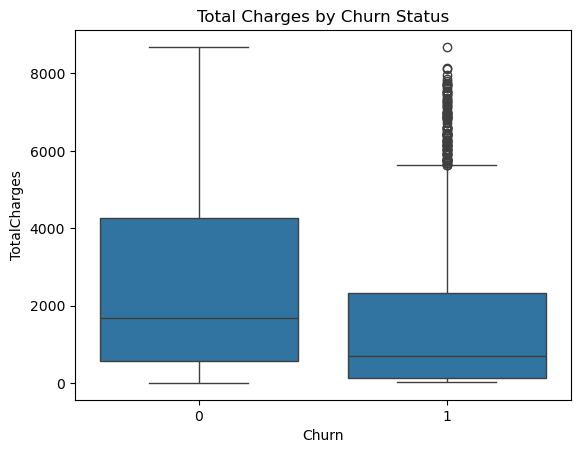

In [18]:
#Revenue vs Churn
plt.figure()
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges by Churn Status")
plt.show()


Customers who did not churn tend to have significantly higher total charges compared to those who churned. This suggests that customers who stay longer accumulate higher total charges, while churned customers often leave early and therefore have lower total charges.

TotalCharges appears to be strongly related to churn and may act as a proxy for customer tenure. Customers with low total charges are more likely to churn, indicating early-stage customers are at higher risk of leaving.
Since TotalCharges depends on tenure, it may be highly correlated with tenure and should be used carefully in predictive models to avoid redundancy.

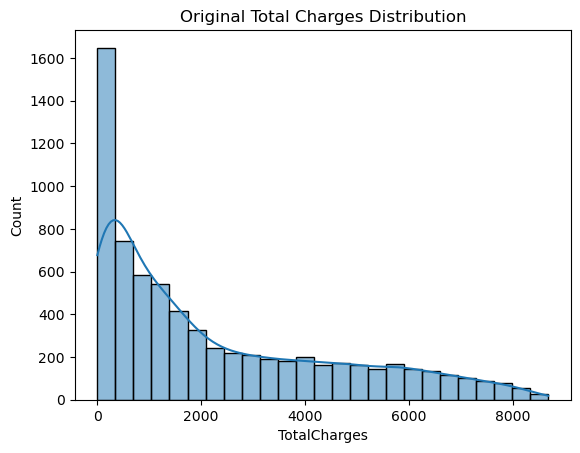

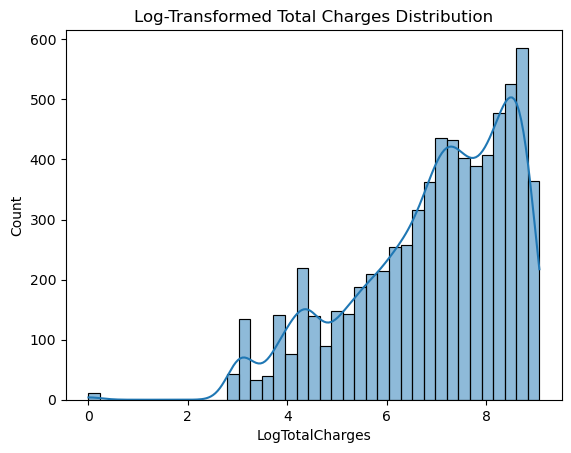

In [19]:
#Log Transformation effect
plt.figure()
sns.histplot(df['TotalCharges'], kde=True)
plt.title("Original Total Charges Distribution")
plt.show()

plt.figure()
sns.histplot(df['LogTotalCharges'], kde=True)
plt.title("Log-Transformed Total Charges Distribution")
plt.show()


The original TotalCharges distribution is highly right-skewed. After applying a log transformation, the distribution becomes more symmetric and closer to a normal distribution, indicating reduced skewness and improved suitability for modeling.
Log transformation is particularly useful here because TotalCharges spans a wide range and contains extreme values, which can disproportionately influence models

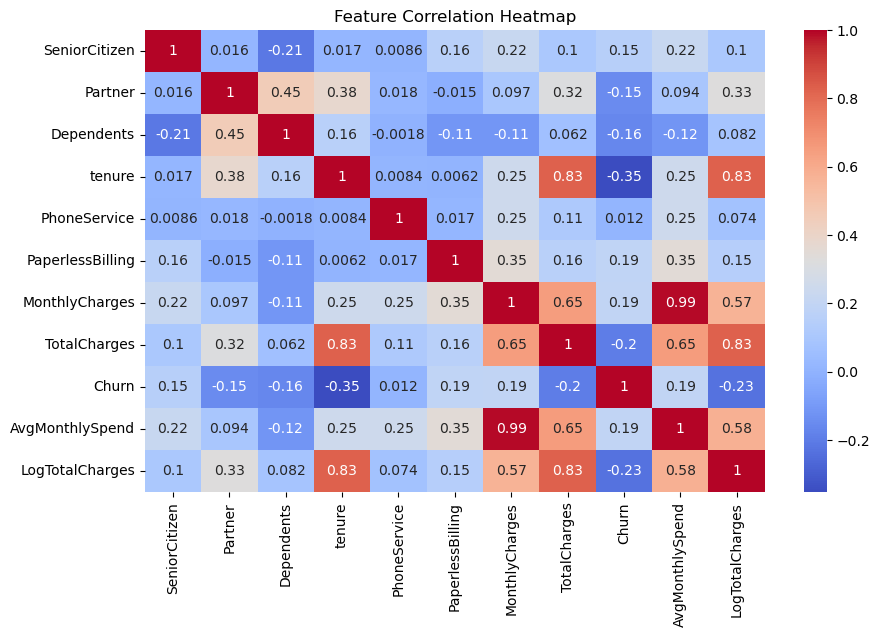

In [20]:
#correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


The correlation heatmap shows strong positive correlation between tenure and TotalCharges, indicating that customers who stay longer accumulate higher total charges. MonthlyCharges shows a weaker correlation with tenure, suggesting pricing is relatively independent of customer longevity.

Since TotalCharges is derived from MonthlyCharges and tenure, high correlation between these features suggests potential multicollinearity, which should be considered when building predictive models.

In [21]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate


Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Approximately 70% of customers have churned, indicating a significant retention challenge.

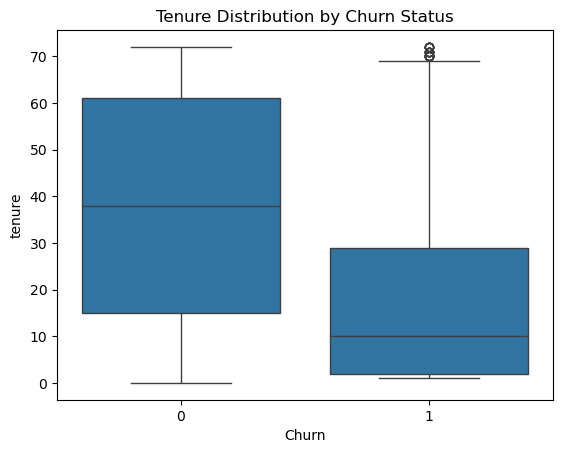

In [22]:
#churn vs tenure
plt.figure()
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure Distribution by Churn Status")
plt.show()


Higher monthly charges may be associated with churn

Pricing sensitivity could be a factor

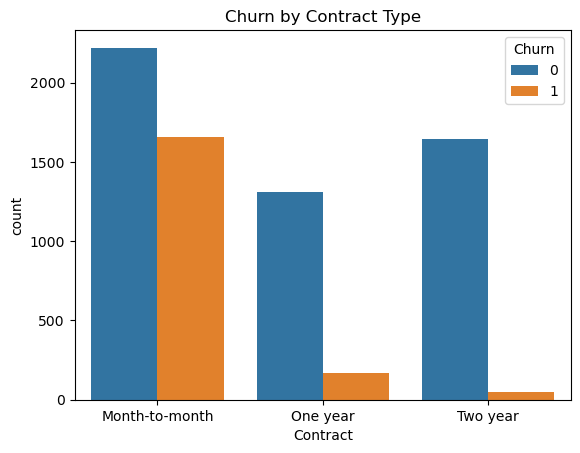

In [23]:
#contract vs churn
plt.figure()
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()


Certain service types show higher churn → service quality or pricing issues.

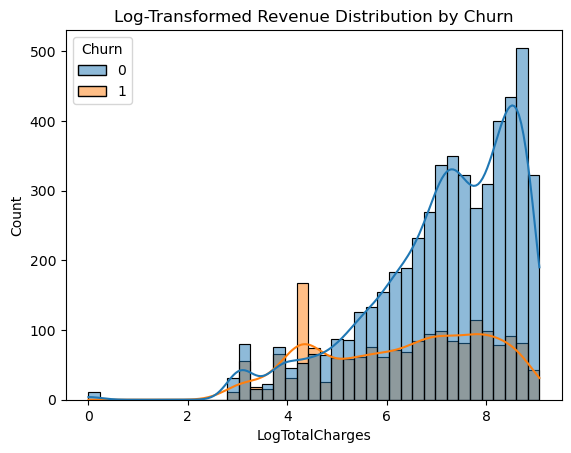

In [24]:
#Log total charges vs Churn
plt.figure()
sns.histplot(data=df, x='LogTotalCharges', hue='Churn', kde=True)
plt.title("Log-Transformed Revenue Distribution by Churn")
plt.show()


Churned customers contribute less long-term revenue.

KEY INSIGHTS

1️1 Revenue & Tenure

 Customers with longer tenure generate significantly higher total charges, confirming that customer lifetime value increases with retention.
Why this is better:
-Mentions significance
-Uses business language (lifetime value)

2 Churn & Spending

 Churned customers tend to have substantially lower total charges, indicating that most churn occurs in the early stages of the customer lifecycle.
Why this works:
-Explains when churn happens
-Connects to customer behavior

3 Data Transformation

 Log transformation of TotalCharges reduced right skewness and produced a more normalized distribution, improving the feature’s suitability for statistical analysis and machine learning models.

4 Churn Risk Timing

 Customers with low tenure are at higher risk of churn, highlighting the importance of early engagement and onboarding strategies.

 TotalCharges is highly correlated with tenure, suggesting potential multicollinearity and the need for careful feature selection during modeling.

SQL

In [25]:
#load data into sql
import sqlite3

conn = sqlite3.connect("telecom.db")
df.to_sql("customers", conn, if_exists="replace", index=False)


7043

In [26]:
#Overal churn rate
pd.read_sql("""SELECT 
    AVG(Churn) * 100 AS churn_rate
FROM customers;
""",conn)

,churn_rate
0,26.536987


Churn is heavily influenced by contract type. Customers on month-to-month contracts are at the highest risk of leaving, whereas customers on two-year contracts are the most loyal. This suggests that encouraging longer-term contracts could be an effective churn-reduction strategy

In [27]:
pd.read_sql("""SELECT 
    Churn,
    AVG(TotalCharges) AS avg_revenue
FROM customers
GROUP BY Churn;
""",conn)

,Churn,avg_revenue
0,0,2549.911442
1,1,1531.796094


Customers who churn generate significantly lower revenue on average compared to those who stay. This highlights that early churn has a substantial financial impact, and retention strategies should focus on new or low-tenure customers

In [28]:
pd.read_sql("""SELECT 
    Contract,
    COUNT(*) AS total_customers,
    AVG(Churn) * 100 AS churn_rate
FROM customers
GROUP BY Contract;
""",conn)

,Contract,total_customers,churn_rate
0,Month-to-month,3875,42.709677
1,One year,1473,11.269518
2,Two year,1695,2.831858


Churn is strongly influenced by contract type. Customers on month-to-month contracts are at the highest risk of leaving, while those on two-year contracts are the most loyal. Encouraging customers to adopt longer-term contracts could significantly reduce churn."

In [29]:
#top ten value customers
pd.read_sql("""SELECT 
    tenure,
    MonthlyCharges,
    TotalCharges
FROM customers
ORDER BY TotalCharges DESC
LIMIT 10;
""",conn)

,tenure,MonthlyCharges,TotalCharges
0,72,117.80,8684.80
1,72,118.75,8672.45
2,72,117.50,8670.10
3,72,116.95,8594.40
4,71,116.25,8564.75
5,72,118.20,8547.15
6,72,116.40,8543.25
7,72,117.15,8529.50
8,72,114.90,8496.70
9,72,116.85,8477.70


In [30]:
#high risk customer churn
pd.read_sql("""SELECT *
FROM customers
WHERE Contract = 'Month-to-month'
AND tenure < 12
AND Churn = 1;
""",conn)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlySpend,LogTotalCharges,TenureGroup,CustomerValue
0,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,54.075000,4.692723,0-1yr,Low Value
1,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,75.825000,5.028148,0-1yr,Low Value
2,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1,102.562500,6.711132,0-1yr,Mid Value
3,Female,0,1,1,10,1,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,0,Credit card (automatic),55.20,528.35,1,52.835000,6.271650,0-1yr,Low Value
4,Male,1,0,0,1,0,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,1,Electronic check,39.65,39.65,1,39.650000,3.704999,0-1yr,Low Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,Female,0,0,0,4,1,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,1,Mailed check,60.40,272.15,1,68.037500,5.610021,0-1yr,Low Value
987,Male,0,1,1,1,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,70.65,70.65,1,70.650000,4.271793,0-1yr,Low Value
988,Female,0,0,0,9,1,No,DSL,No,No,No,No,No,No,Month-to-month,1,Bank transfer (automatic),44.20,403.35,1,44.816667,6.002281,0-1yr,Low Value
989,Male,1,0,0,1,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,75.75,75.75,1,75.750000,4.340553,0-1yr,Low Value


Customers on month-to-month contracts with less than 12 months tenure represent a high-risk churn segment. Targeted retention strategies, such as onboarding programs, early incentives, or personalized offers, should focus on this group to reduce early-stage churn.

1.Focus on Early-Stage Customer Retention

Customers with low tenure show the highest churn risk.

Implement onboarding programs, welcome offers, or first-3-month incentives.

Recommendation:
- Introduce loyalty discounts, free add-ons, or proactive support within the first 90 days.

2.Target High-Value Long-Tenure Customers

Long-tenure customers generate significantly higher total revenue.

Retaining them has a strong impact on overall profitability.

Recommendation:
-Create VIP plans, contract upgrades, or personalized offers to protect high-value customers.

3.Improve Churn Prediction & Monitoring

Strong relationships exist between tenure, total charges, and churn.

These features are effective for predictive modeling.

Recommendation:
-Use churn prediction models to flag at-risk customers early and trigger retention actions automatically.

4.Use Data Transformations in Modeling

Log-transformed financial variables produce better distributions.

This improves model stability and interpretability.

Recommendation:
-Apply appropriate transformations and feature selection to improve model accuracy and reliability.

BUSINESS RECOMMENDATIONS

CONCLUSION

This analysis explored customer churn patterns using demographic, service, and billing data. Results show that churn is strongly associated with customer tenure and total charges, with early-tenure customers being the most vulnerable. Long-term customers contribute significantly more revenue, emphasizing the importance of retention strategies. Data preprocessing, including handling missing values and applying log transformations, improved data quality and analytical reliability. These insights can support data-driven decision-making and inform effective churn prevention strategies.